## Evidencia 2 pregunta 5

A continuación se presenta el desarrollo de la pregunta 5 relativa a la programación genética y la ruta a seguir para visitar las 7 maravillas del mundo moderno.

En julio de 2007, después de una reñida selección, se dieron a conocer las “siete maravillas del mundo moderno”. Utiliza tus conocimientos de programación genética y elabora un programa en Python para determinar cuál sería el orden más adecuado para visitar estos increíbles lugares.

Toma en cuenta las siguientes condiciones:
1. No se pueden repetir los destinos.
2. Los viajes se consideran punto a punto, pero debido a las grandes distancias, se debe utilizar la función del semiverseno para encontrar el valor de la distancia que separa los destinos.
3. El objetivo es minimizar la distancia total.

In [60]:
#Importando librerias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import operator
from haversine import haversine

In [61]:
#Leyendo la fuente de datos con las coordenadas de las maravillas
df = pd.read_csv('https://raw.githubusercontent.com/janus78/MasterIA-Notebooks_Tetra3/master/SieteMaravillasMundoModerno.csv')
df.head(10)

,Nombre,Latitud,Longitud
0,Chichen Itza,20.68306,-88.56861
1,Coliseo de Roma,41.89028,12.49222
2,Cristo Redentor,-22.95194,-43.21055
3,Muralla China,40.43205,116.57037
4,Machu Picchu,-13.16312,-72.54496
5,Petra,30.32853,35.44436
6,Taj Mahal,27.17537,78.04210


In [62]:
# creando la clase para las maravillas
class maravilla:
    def __init__(self, x, y):
        self.x = x
        self.y = y

    def distancia(self, maravilla):
        #Implementando la función haverseno para calcular las distancias de la tierra con el modulo haversine
        distancia = haversine((self.x, self.y), (maravilla.x, maravilla.y))
        return distancia

    def __repr__(self):
        return "(" + str(self.x) + "," + str(self.y) + ")"

In [63]:
# creando una lista de maravillas
listaMaravillas = []

for i in range(0,len(df)):
    listaMaravillas.append(maravilla(x=df.Latitud[i], y=df.Longitud[i]))

#vista previa de la informacion de las ubiciones de las maravillas
listaMaravillas[0:5]

[(20.68306,-88.56861),
 (41.89028,12.49222),
 (-22.95194,-43.21055),
 (40.43205,116.57037),
 (-13.16312,-72.54496)]

In [64]:
#Creando la clase aptitud para las maravillas
class Aptitud:
    def __init__(self, ruta):
        self.ruta = ruta
        self.distancia = 0
        self.aptitud= 0.0

    def distanciaRuta(self):
        if self.distancia ==0:
            distanciaRelativa = 0
            for i in range(0, len(self.ruta)):
                puntoInicial = self.ruta[i]
                puntoFinal = None
                if i + 1 < len(self.ruta):
                    puntoFinal = self.ruta[i + 1]
                else:
                    puntoFinal = self.ruta[0]
                distanciaRelativa += puntoInicial.distancia(puntoFinal)
            self.distancia = distanciaRelativa
        return self.distancia

    def rutaApta(self):
        if self.aptitud == 0:
            self.aptitud = 1 / float(self.distanciaRuta())
        return self.aptitud

In [65]:
#Funcion para crear una ruta aleatoria
def crearRuta(listaMaravillas):
    route = random.sample(listaMaravillas, len(listaMaravillas))
    return route

In [66]:
#Funcion para crear una poblacion de rutas
def poblacionInicial(tamanoPob, listaMaravillas):
    poblacion = []

    for i in range(0, tamanoPob):
        poblacion.append(crearRuta(listaMaravillas))
    return poblacion

In [67]:
#funcion para la classificacion de rutas
def clasificacionRutas(poblacion):
    fitnessResults = {}
    for i in range(0,len(poblacion)):
        fitnessResults[i] = Aptitud(poblacion[i]).rutaApta()
    return sorted(fitnessResults.items(), key = operator.itemgetter(1), reverse = True)

In [68]:
#funcion para la seleccion de rutas
def seleccionRutas(popRanked, indivSelecionados):
    resultadosSeleccion = []
    df = pd.DataFrame(np.array(popRanked), columns=["Indice","Aptitud"])
    df['cum_sum'] = df.Aptitud.cumsum()
    df['cum_perc'] = 100*df.cum_sum/df.Aptitud.sum()

    for i in range(0, indivSelecionados):
        resultadosSeleccion.append(popRanked[i][0])
    for i in range(0, len(popRanked) - indivSelecionados):
        pick = 100*random.random()
        for i in range(0, len(popRanked)):
            if pick <= df.iat[i,3]:
                resultadosSeleccion.append(popRanked[i][0])
                break
    return resultadosSeleccion

In [69]:
#funcion para el grupo de cruza
def grupoApareamiento(poblacion, resultadosSeleccion):
    grupoApareamiento = []
    for i in range(0, len(resultadosSeleccion)):
        index = resultadosSeleccion[i]
        grupoApareamiento.append(poblacion[index])
    return grupoApareamiento

In [70]:
#funcion para el cruzamiento
def reproduccion(progenitor1, progenitor2):
    hijo = []
    hijoP1 = []
    hijoP2 = []

    geneA = int(random.random() * len(progenitor1))
    geneB = int(random.random() * len(progenitor2))

    startGene = min(geneA, geneB)
    endGene = max(geneA, geneB)

    for i in range(startGene, endGene):
        hijoP1.append(progenitor1[i])

    hijoP2 = [item for item in progenitor2 if item not in hijoP1]

    hijo = hijoP1 + hijoP2
    return hijo

In [71]:
#funcion para el cruzamiento de la población
def reproduccionPoblacion(grupoApareamiento, indivSelecionados):
    hijos = []
    tamano = len(grupoApareamiento) - indivSelecionados
    espacio = random.sample(grupoApareamiento, len(grupoApareamiento))

    for i in range(0,indivSelecionados):
        hijos.append(grupoApareamiento[i])

    for i in range(0, tamano):
        hijo = reproduccion(espacio[i], espacio[len(grupoApareamiento)-i-1])
        hijos.append(hijo)
    return hijos

In [72]:
# función para la mutacion
def mutacion(individuo, razonMutacion):
    for swapped in range(len(individuo)):
        if(random.random() < razonMutacion):
            swapWith = int(random.random() * len(individuo))

            lugar1 = individuo[swapped]
            lugar2 = individuo[swapWith]

            individuo[swapped] = lugar2
            individuo[swapWith] = lugar1
    return individuo

In [73]:
# funcion para la mutacion de la poblacion
def mutacionPoblacion(poblacion, razonMutacion):
    pobMutada = []

    for ind in range(0, len(poblacion)):
        individuoMutar = mutacion(poblacion[ind], razonMutacion)
        pobMutada.append(individuoMutar)
    return pobMutada

In [74]:

# Funcion para la seleccion de la siguiente generacion
def nuevaGeneracion(generacionActual, indivSelecionados, razonMutacion):

    #clasificar rutas
    popRanked = clasificacionRutas(generacionActual)

    #seleccion de los candidatos
    selectionResults = seleccionRutas(popRanked, indivSelecionados)

    #generar grupo de apareamiento
    grupoApa = grupoApareamiento(generacionActual, selectionResults)

    #generacion de la poblacion cruzada, reproducida
    hijos = reproduccionPoblacion(grupoApa, indivSelecionados)

    #incluir las mutaciones en la nueva generacion
    nextGeneration = mutacionPoblacion(hijos, razonMutacion)

    return nextGeneration

In [75]:
# Funcion para la ejecucion del algoritmo genetico
def algoritmoGenetico(poblacion, tamanoPoblacion, indivSelecionados, razonMutacion, generaciones):
    pop = poblacionInicial(tamanoPoblacion, poblacion)
    print("Distancia Inicial: " + str(1 / clasificacionRutas(pop)[0][1]))

    for i in range(0, generaciones):
        pop = nuevaGeneracion(pop, indivSelecionados, razonMutacion)

    print("Distancia Final: " + str(1 / clasificacionRutas(pop)[0][1]))
    bestRouteIndex = clasificacionRutas(pop)[0][0]
    mejorRuta = pop[bestRouteIndex]
    return mejorRuta

In [78]:
# Funcion para la ejecucion del algoritmo genetico
algoritmoGenetico(poblacion=listaMaravillas,
                  tamanoPoblacion=7,
                  indivSelecionados=3,
                  razonMutacion=0.01,
                  generaciones=500)

Distancia Inicial: 55552.85872129077
Distancia Final: 39748.6639959402


[(30.32853,35.44436),
 (41.89028,12.49222),
 (-22.95194,-43.21055),
 (-13.16312,-72.54496),
 (20.68306,-88.56861),
 (40.43205,116.57037),
 (27.17537,78.0421)]

In [79]:
#Grafico del algoritmo genetico
def geneticAlgorithmPlot(population, popSize, eliteSize, mutationRate, generations):
    pop = poblacionInicial(popSize, population)
    progress = []
    progress.append(1 / clasificacionRutas(pop)[0][1])

    for i in range(0, generations):
        pop = nuevaGeneracion(pop, eliteSize, mutationRate)
        progress.append(1 / clasificacionRutas(pop)[0][1])

    plt.plot(progress)
    plt.ylabel('Distancia')
    plt.xlabel('Generacion')
    plt.show()

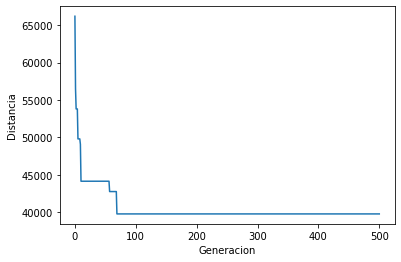

In [81]:
geneticAlgorithmPlot(population=listaMaravillas, popSize=7, eliteSize=3, mutationRate=0.01, generations=500)